In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## **1.1. Phương pháp Gradient**

In [ ]:
#1. Viết hàm gradientEdges cho phép lọc tách biên ảnh theo phương pháp Gradient với
#bộ lọc tùy chọn Robert, Prewitt, Sobel. 

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gradientEdges(img_gray, method='Sobel'):

    # Các mặt nạ cho từng phương pháp
    if method == 'Robert':
        # Nếu chọn bộ lọc Robert thì sẽ có bộ ma trận Gx, Gy như sau
        Gx = np.array([[1, 0], [0, -1]], dtype=int)
        Gy = np.array([[0, 1], [-1, 0]], dtype=int)
    elif method == 'Prewitt':
        # Nếu chọn bộ lọc Prewitt thì sẽ có bộ ma trận Gx, Gy như sau
        Gx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
        Gy = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    elif method == 'Sobel':
        # Nếu chọn bộ lọc Sobel thì sẽ có bộ ma trận Gx, Gy như sau
        Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
        Gy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    else:
        raise ValueError("Phương pháp phải là 'Robert', 'Prewitt', hoặc 'Sobel'")

    # Tính toán gradient theo x và y
    #Theo biên dọc (Gx)
    Gx = cv2.filter2D(img_gray, cv2.CV_64F, Gx)
    #Theo biên ngang (Gy)
    Gy = cv2.filter2D(img_gray, cv2.CV_64F, Gy)

    # Tính toán độ lớn của gradient
    gradient_magnitude = np.sqrt(Gx**2 + Gy**2)
    gradient_magnitude = np.uint8(gradient_magnitude)

    # Hiển thị kết quả
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    plt.title('Ảnh gốc')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.subplot(2, 2, 2)
    plt.title('Ảnh toàn biên')
    plt.imshow(gradient_magnitude, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.title('Ảnh biên dọc')
    plt.imshow(np.abs(Gx), cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.title('Ảnh biên ngang')
    plt.imshow(np.abs(Gy), cmap='gray')
    plt.axis('off')
    
    plt.show()

# Đọc ảnh đầu vào
image = cv2.imread('puppy1.jpg')

# Chuyển đổi ảnh sang ảnh xám
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

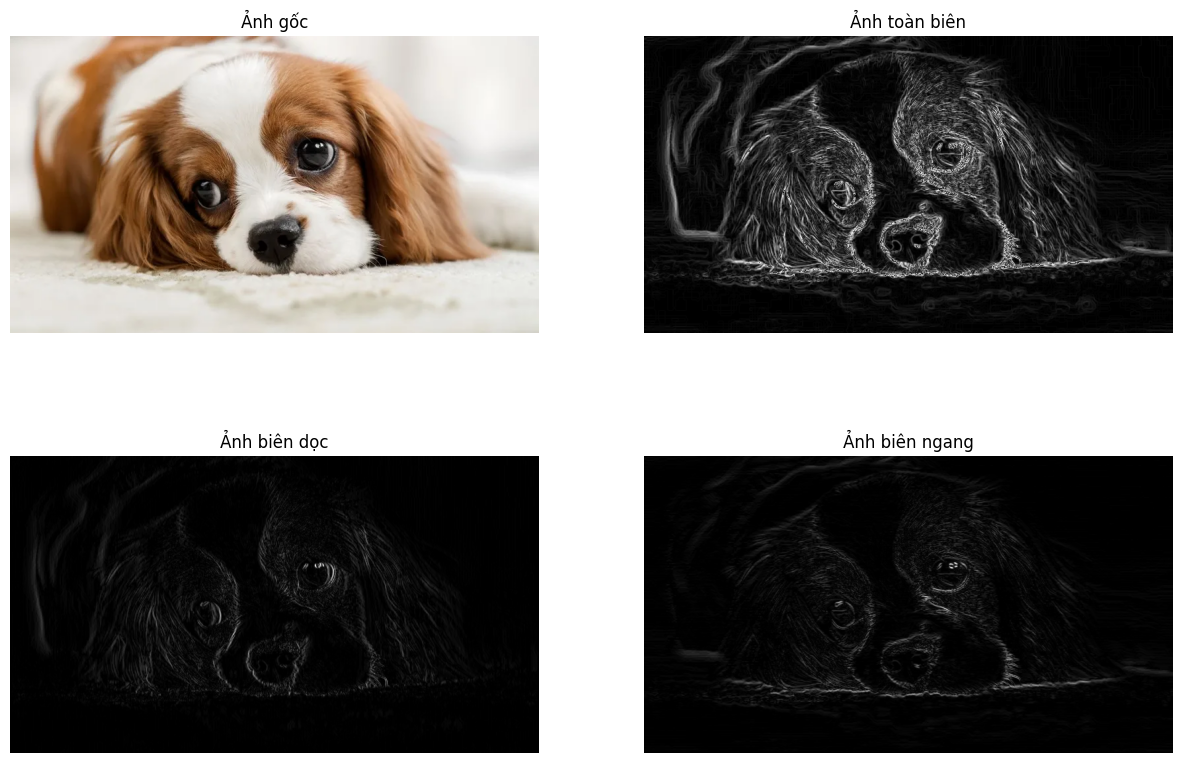

In [6]:
# Lọc tách biên theo phương pháp Sobel
gradientEdges(img_gray, "Sobel")

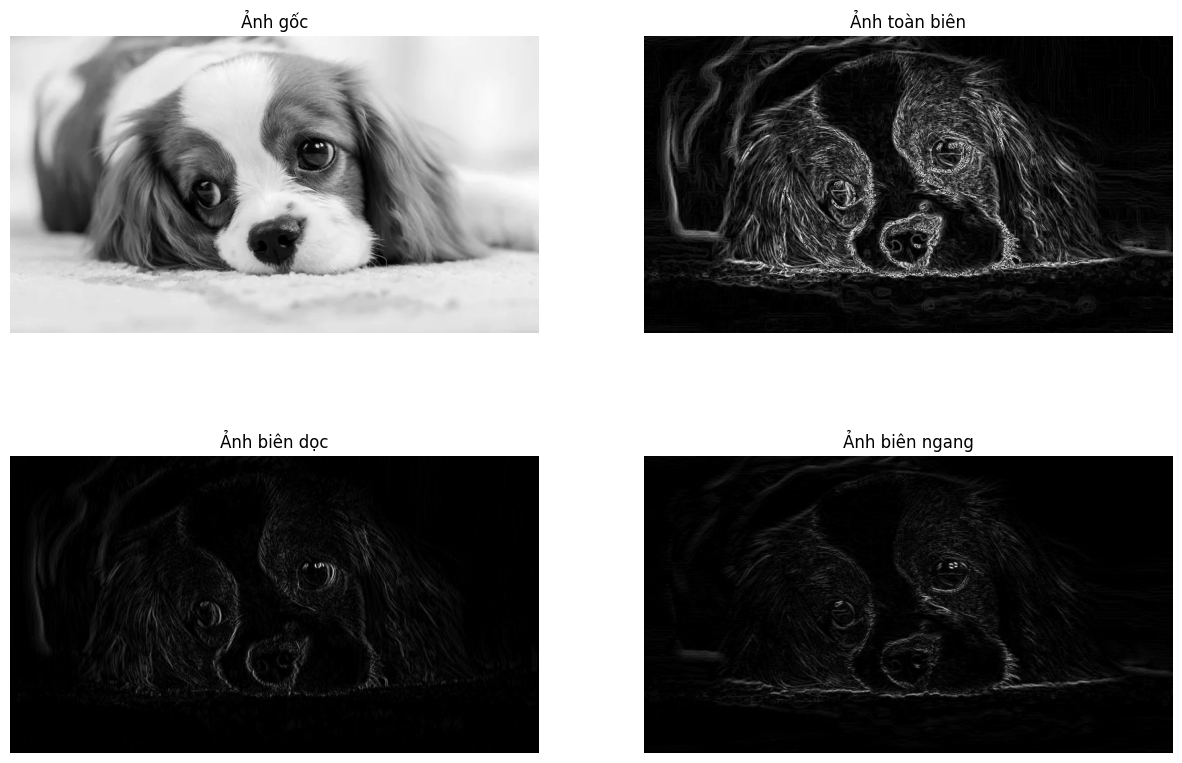

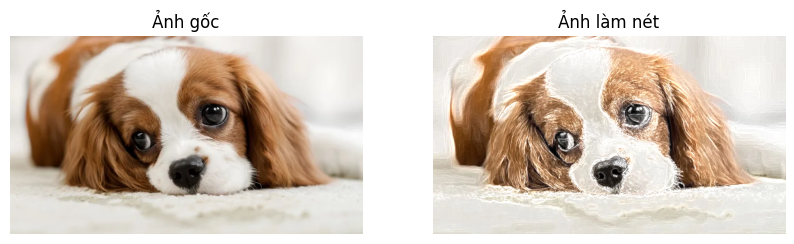

In [9]:
#2. Mở rộng hàm cho việc làm nét ảnh với biên thu được

def gradientEdges(img_gray, method='Sobel'):
    # Các mặt nạ cho từng phương pháp
    if method == 'Robert':
        # Nếu chọn bộ lọc Robert thì sẽ có bộ ma trận Gx, Gy như sau
        Gx = np.array([[1, 0], [0, -1]])
        Gy = np.array([[0, 1], [-1, 0]])
    elif method == 'Prewitt':
        # Nếu chọn bộ lọc Prewitt thì sẽ có bộ ma trận Gx, Gy như sau
        Gx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
        Gy = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    elif method == 'Sobel':
        # Nếu chọn bộ lọc Sobel thì sẽ có bộ ma trận Gx, Gy như sau
        Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
        Gy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    else:
        raise ValueError("Phương pháp phải là 'Robert', 'Prewitt', hoặc 'Sobel'")

    # Tính toán gradient theo x và y
    Gx = cv2.filter2D(img_gray, cv2.CV_64F, Gx)
    Gy = cv2.filter2D(img_gray, cv2.CV_64F, Gy)

    # Tính toán độ lớn của gradient
    gradient_magnitude = np.sqrt(Gx**2 + Gy**2)
    gradient_magnitude = np.uint8(gradient_magnitude)

    # Hiển thị kết quả
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    plt.title('Ảnh gốc')
    plt.imshow(img_gray, cmap='gray')
    plt.axis('off')
    
    plt.subplot(2, 2, 2)
    plt.title('Ảnh toàn biên')
    plt.imshow(gradient_magnitude, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.title('Ảnh biên dọc')
    plt.imshow(np.abs(Gx), cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.title('Ảnh biên ngang')
    plt.imshow(np.abs(Gy), cmap='gray')
    plt.axis('off')
    
    plt.show()

    return gradient_magnitude, Gx, Gy

def sharpenImage(image, edges):
    # Chuyển đổi edges sang ảnh 3 kênh để cộng với ảnh gốc
    edges_3ch = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    sharpened = cv2.addWeighted(image, 1, edges_3ch, 1, 0)
    
    # Hiển thị kết quả
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Ảnh gốc')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Ảnh làm nét')
    plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.show()

    return sharpened

# Đọc ảnh đầu vào
image = cv2.imread('puppy1.jpg')

# Chuyển đổi ảnh sang ảnh xám
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Lọc tách biên theo phương pháp Sobel
edges, Gx, Gy = gradientEdges(img_gray, 'Sobel')

# Làm nét ảnh với biên thu được
sharpened_image = sharpenImage(image, edges)


In [ ]:
#2. Mở rộng hàm cho việc làm nét ảnh với biên thu được

def gradientEdgesNet(image, operator):
    if operator == 'Robert':
        # Nếu chọn bộ lọc Robert thì sẽ có bộ ma trận Gx, Gy như sau
        Gx = np.array([[1, 0], [0, -1]])
        Gy = np.array([[0, 1], [-1, 0]])
    elif operator == 'Prewitt':
        # Nếu chọn bộ lọc Prewitt thì sẽ có bộ ma trận Gx, Gy như sau
        Gx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
        Gy = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    elif operator == 'Sobel':
        # Nếu chọn bộ lọc Sobel thì sẽ có bộ ma trận Gx, Gy như sau
        Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
        Gy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    # Áp ma trận vào ảnh 
    gradient_x = cv2.filter2D(src=image, ddepth=-1, kernel=Gx)
    gradient_y = cv2.filter2D(src=image, ddepth=-1, kernel=Gy)
    
    # Tính toán toàn biên (Gx + Gy)
    magnitude = (gradient_x + gradient_y)
    
    # Nếu cần làm mịn ảnh toàn biên

    # Làm nét ảnh bằng cách áp dụng bộ lọc làm nét sharpen_kernel với ảnh toàn biên và biên ngang
    sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)  # Bộ lọc làm nét
    magnitude = cv2.filter2D(src=magnitude, ddepth=-1, kernel=sharpen_kernel) 
    gradient_x = cv2.filter2D(src=gradient_x, ddepth=-1, kernel=sharpen_kernel)
    gradient_y = cv2.filter2D(src=gradient_y, ddepth=-1, kernel=sharpen_kernel)
    

    # Hiển thị ảnh lên subplot
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Ảnh gốc')
    plt.subplot(2, 2, 2)
    plt.imshow(magnitude, cmap='gray')
    plt.title('Ảnh toàn biên')

    plt.subplot(2, 2, 3)
    plt.imshow(gradient_x, cmap='gray')
    plt.title('Ảnh biên dọc')

    plt.subplot(2, 2, 4)
    plt.imshow(gradient_y, cmap='gray')
    plt.title('Ảnh biên ngang')

    plt.show()

## **1.2. Phương pháp Laplacian**

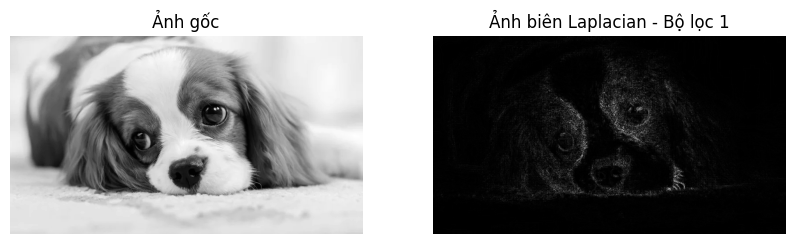

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def laplacianEdges(img_gray, filter_type=1):
    # Các mặt nạ Laplacian
    filters = [
        np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=int),
        np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], dtype=int),
        np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]], dtype=int),
        np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], np.float32)
    ]
    
    # Kiểm tra filter_type hợp lệ
    if filter_type < 1 or filter_type > 4:
        raise ValueError("Filter type must be between 1 and 4")
    
    # Chọn bộ lọc Laplacian tương ứng
    kernel = filters[filter_type - 1]

    # Áp dụng bộ lọc Laplacian
    laplacian = cv2.filter2D(img_gray, cv2.CV_64F, kernel) # => Tại sao dùng cv2.CV_64F
    laplacian = np.uint8(np.absolute(laplacian)) # =>?

    # Hiển thị kết quả
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Ảnh gốc')
    plt.imshow(img_gray, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f'Ảnh biên Laplacian - Bộ lọc {filter_type}')
    plt.imshow(laplacian, cmap='gray')
    plt.axis('off')
    
    plt.show()

    return laplacian

# Đọc ảnh đầu vào
image = cv2.imread('puppy1.jpg')

# Chuyển đổi ảnh sang ảnh xám
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Lọc tách biên theo phương pháp Laplacian với bộ lọc thứ 1
edges = laplacianEdges(img_gray, filter_type=1)


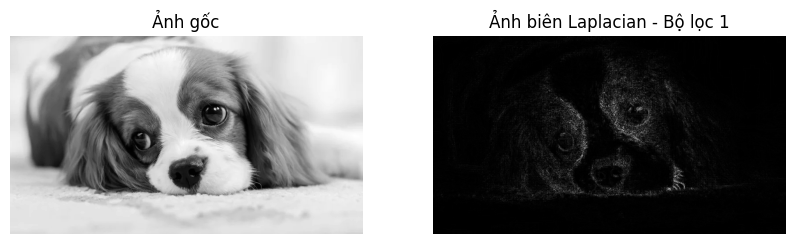

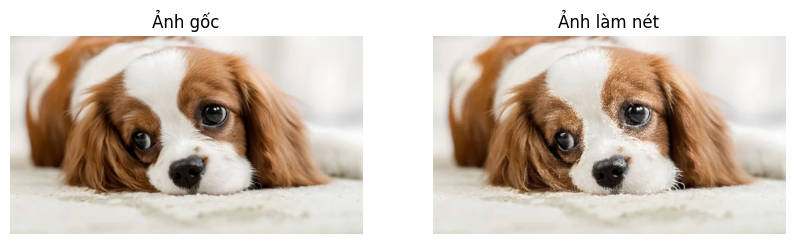

In [11]:
#2. Mở rộng hàm cho việc làm nét ảnh với biên thu được

import cv2
import numpy as np
import matplotlib.pyplot as plt

def laplacianEdges(img_gray, filter_type=1):
    # Các mặt nạ Laplacian
    filters = [
        np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=int),
        np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], dtype=int),
        np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]], dtype=int),
        np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], np.float32)
    ]
    
    # Kiểm tra filter_type hợp lệ
    if filter_type < 1 or filter_type > 4:
        raise ValueError("Filter type must be between 1 and 4")
    
    # Chọn bộ lọc Laplacian tương ứng
    kernel = filters[filter_type - 1]

    # Áp dụng bộ lọc Laplacian
    laplacian = cv2.filter2D(img_gray, cv2.CV_64F, kernel)
    laplacian = np.uint8(np.absolute(laplacian))

    # Hiển thị kết quả
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Ảnh gốc')
    plt.imshow(img_gray, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f'Ảnh biên Laplacian - Bộ lọc {filter_type}')
    plt.imshow(laplacian, cmap='gray')
    plt.axis('off')
    
    plt.show()

    return laplacian

def sharpenImage(image, edges):
    # Chuyển đổi edges sang ảnh 3 kênh để cộng với ảnh gốc
    edges_3ch = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    sharpened = cv2.addWeighted(image, 1, edges_3ch, 1, 0)
    
    # Hiển thị kết quả
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Ảnh gốc')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Ảnh làm nét')
    plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.show()

    return sharpened

# Đọc ảnh đầu vào
image = cv2.imread('puppy1.jpg')

# Chuyển đổi ảnh sang ảnh xám
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Lọc tách biên theo phương pháp Laplacian với bộ lọc thứ 1
edges = laplacianEdges(img_gray, filter_type=1)

# Làm nét ảnh với biên thu được
sharpened_image = sharpenImage(image, edges)


Do trang web không cho phép truy cập nội dung, tôi sẽ trình bày các bước thực hiện lọc tách biên với bộ lọc Canny dựa trên kiến thức của mình về thuật toán này.

### Các bước thực hiện lọc tách biên với bộ lọc Canny:

1. **Giảm nhiễu (Noise Reduction)**:
   - Sử dụng bộ lọc Gaussian để làm mờ ảnh và loại bỏ nhiễu. Nhiễu trong ảnh có thể gây ra các biên giả và làm cho quá trình phát hiện biên không chính xác.
   ```python
   img_blur = cv2.GaussianBlur(img_gray, (5, 5), 1.4)
   ```

2. **Tính toán gradient cường độ (Finding the Intensity Gradient)**:
   - Sử dụng đạo hàm Sobel để tính toán gradient theo hướng x và y. Gradient giúp xác định mức độ thay đổi của cường độ sáng trong ảnh.
   ```python
   grad_x = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
   grad_y = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
   ```

3. **Không cực đại hóa (Non-maximum Suppression)**:
   - Loại bỏ các giá trị không cực đại để giữ lại các biên mỏng nhất. Điều này giúp làm giảm các biên giả và làm cho biên trở nên rõ ràng hơn.
   - Tính độ lớn của gradient và hướng của gradient.
   ```python
   magnitude = np.sqrt(grad_x**2 + grad_y**2)
   angle = np.arctan2(grad_y, grad_x) * (180 / np.pi)
   angle[angle < 0] += 180
   ```

4. **Ngưỡng hóa với hiệu ứng trễ (Hysteresis Thresholding)**:
   - Sử dụng hai ngưỡng: ngưỡng thấp và ngưỡng cao. Các điểm ảnh có giá trị gradient lớn hơn ngưỡng cao được coi là biên chắc chắn, trong khi các điểm ảnh có giá trị gradient giữa ngưỡng thấp và ngưỡng cao chỉ được coi là biên nếu chúng kết nối với các biên chắc chắn.
   ```python
   edges = cv2.Canny(img_blur, low_threshold, high_threshold)
   ```

### Đoạn mã ví dụ:

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

def cannyEdgeDetection(image, low_threshold=50, high_threshold=150):
    # Chuyển đổi ảnh sang ảnh xám
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Giảm nhiễu bằng bộ lọc Gaussian
    img_blur = cv2.GaussianBlur(img_gray, (5, 5), 1.4)
    
    # Lọc tách biên bằng Canny
    edges = cv2.Canny(img_blur, low_threshold, high_threshold)
    
    # Hiển thị kết quả
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Ảnh gốc')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Ảnh biên Canny')
    plt.imshow(edges, cmap='gray')
    plt.axis('off')
    
    plt.show()

    return edges

# Đọc ảnh đầu vào
image = cv2.imread('puppy1.jpg')

# Lọc tách biên theo phương pháp Canny
edges = cannyEdgeDetection(image)
```

### Giải thích các bước:
1. **Chuyển đổi ảnh sang ảnh xám**: Giúp đơn giản hóa quá trình xử lý bằng cách chỉ làm việc với một kênh màu.
2. **Giảm nhiễu**: Sử dụng bộ lọc Gaussian để loại bỏ nhiễu, giúp quá trình phát hiện biên chính xác hơn.
3. **Lọc tách biên bằng Canny**: Áp dụng thuật toán Canny với ngưỡng thấp và ngưỡng cao để phát hiện các biên trong ảnh.
4. **Hiển thị kết quả**: Sử dụng `matplotlib` để hiển thị ảnh gốc và ảnh biên.

Bạn có thể điều chỉnh giá trị của `low_threshold` và `high_threshold` để thay đổi độ nhạy của bộ lọc Canny đối với các biên trong ảnh.

Dưới đây là đoạn chương trình thực hiện lọc tách biên với bộ lọc Canny kèm theo giải thích chi tiết từng câu lệnh:

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

def cannyEdgeDetection(image, low_threshold=50, high_threshold=150):
    # Chuyển đổi ảnh sang ảnh xám
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Giải thích: Chuyển ảnh màu gốc sang ảnh xám để đơn giản hóa quá trình xử lý ảnh,
    # vì chúng ta chỉ cần thông tin độ sáng (intensity) để phát hiện biên.

    # Giảm nhiễu bằng bộ lọc Gaussian
    img_blur = cv2.GaussianBlur(img_gray, (5, 5), 1.4)
    # Giải thích: Sử dụng bộ lọc Gaussian để làm mờ ảnh và giảm nhiễu. Kích thước kernel
    # là 5x5 và độ lệch chuẩn sigma là 1.4. Việc giảm nhiễu giúp tránh phát hiện các biên giả.

    # Lọc tách biên bằng Canny
    edges = cv2.Canny(img_blur, low_threshold, high_threshold)
    # Giải thích: Sử dụng hàm Canny để phát hiện các biên trong ảnh. Ngưỡng thấp và ngưỡng
    # cao được đặt lần lượt là 50 và 150. Các pixel có giá trị gradient lớn hơn ngưỡng cao sẽ
    # được coi là biên chắc chắn, còn các pixel có giá trị gradient giữa hai ngưỡng chỉ được coi là biên
    # nếu chúng kết nối với các biên chắc chắn.

    # Hiển thị kết quả
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Ảnh gốc')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    # Giải thích: Hiển thị ảnh gốc sử dụng matplotlib. Chuyển đổi không gian màu từ BGR
    # (mặc định trong OpenCV) sang RGB để hiển thị đúng màu sắc.

    plt.subplot(1, 2, 2)
    plt.title('Ảnh biên Canny')
    plt.imshow(edges, cmap='gray')
    plt.axis('off')
    # Giải thích: Hiển thị ảnh biên sau khi áp dụng bộ lọc Canny. Sử dụng cmap='gray' để
    # hiển thị ảnh dưới dạng ảnh xám.

    plt.show()

    return edges

# Đọc ảnh đầu vào
image = cv2.imread('puppy1.jpg')
# Giải thích: Đọc ảnh từ file 'puppy1.jpg'. Đảm bảo rằng file ảnh nằm trong cùng thư mục với file script,
# hoặc cung cấp đường dẫn đầy đủ đến file ảnh.

# Lọc tách biên theo phương pháp Canny
edges = cannyEdgeDetection(image)
# Giải thích: Gọi hàm cannyEdgeDetection để thực hiện lọc tách biên trên ảnh đầu vào.
# Kết quả trả về là ảnh biên được lưu trong biến 'edges'.
```

### Giải thích chi tiết từng câu lệnh:
1. **Chuyển đổi ảnh sang ảnh xám**:
   ```python
   img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
   ```
   - Chuyển ảnh màu sang ảnh xám để xử lý dễ dàng hơn vì chỉ cần làm việc với một kênh màu duy nhất.

2. **Giảm nhiễu bằng bộ lọc Gaussian**:
   ```python
   img_blur = cv2.GaussianBlur(img_gray, (5, 5), 1.4)
   ```
   - Sử dụng bộ lọc Gaussian để làm mờ ảnh và loại bỏ nhiễu, giúp tránh phát hiện các biên giả.

3. **Lọc tách biên bằng Canny**:
   ```python
   edges = cv2.Canny(img_blur, low_threshold, high_threshold)
   ```
   - Áp dụng bộ lọc Canny với ngưỡng thấp và ngưỡng cao để phát hiện biên. Các điểm ảnh có giá trị gradient lớn hơn ngưỡng cao sẽ được coi là biên chắc chắn, còn các điểm ảnh có giá trị gradient giữa hai ngưỡng chỉ được coi là biên nếu chúng kết nối với các biên chắc chắn.

4. **Hiển thị kết quả**:
   ```python
   plt.figure(figsize=(10, 5))
   plt.subplot(1, 2, 1)
   plt.title('Ảnh gốc')
   plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
   plt.axis('off')
   
   plt.subplot(1, 2, 2)
   plt.title('Ảnh biên Canny')
   plt.imshow(edges, cmap='gray')
   plt.axis('off')
   
   plt.show()
   ```
   - Sử dụng `matplotlib` để hiển thị ảnh gốc và ảnh biên sau khi áp dụng bộ lọc Canny. Chuyển đổi không gian màu từ BGR sang RGB để hiển thị đúng màu sắc của ảnh gốc.

# **2. XỬ LÝ HÌNH THÁI ẢNH**

Do không thể truy cập nội dung từ trang web GeeksforGeeks, tôi sẽ trình bày các hiểu biết về phép ăn mòn (Erosion) và phép làm dày (Dilation) ảnh dựa trên kiến thức về xử lý ảnh.

### Phép ăn mòn (Erosion)
Phép ăn mòn trong xử lý ảnh là quá trình làm giảm kích thước của các đối tượng trong ảnh. Phép ăn mòn hoạt động bằng cách quét một phần tử cấu trúc (structuring element) qua ảnh và chỉ giữ lại các điểm ảnh (pixel) trung tâm nếu tất cả các điểm ảnh trong phần tử cấu trúc đều khớp với đối tượng trong ảnh. Nếu bất kỳ điểm ảnh nào trong phần tử cấu trúc không khớp, điểm ảnh trung tâm sẽ bị xóa.

**Ứng dụng**:
- Loại bỏ nhiễu nhỏ.
- Tách các đối tượng nối liền nhau.

**Hàm trong OpenCV**:
```python
cv2.erode(src, kernel, iterations=1)
```
- `src`: Ảnh đầu vào.
- `kernel`: Phần tử cấu trúc.
- `iterations`: Số lần thực hiện phép ăn mòn.

### Phép làm dày (Dilation)
Phép làm dày trong xử lý ảnh là quá trình mở rộng kích thước của các đối tượng trong ảnh. Phép làm dày hoạt động bằng cách quét một phần tử cấu trúc qua ảnh và nếu bất kỳ điểm ảnh nào trong phần tử cấu trúc khớp với đối tượng trong ảnh, điểm ảnh trung tâm sẽ được thêm vào đối tượng.

**Ứng dụng**:
- Lấp đầy các lỗ hổng nhỏ trong các đối tượng.
- Kết nối các phần tử nhỏ thành một khối lớn.

**Hàm trong OpenCV**:
```python
cv2.dilate(src, kernel, iterations=1)
```
- `src`: Ảnh đầu vào.
- `kernel`: Phần tử cấu trúc.
- `iterations`: Số lần thực hiện phép làm dày.

### Đoạn mã ví dụ:

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

def applyMorphologicalOperations(image):
    # Chuyển đổi ảnh sang ảnh xám
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Tạo phần tử cấu trúc
    kernel = np.ones((5, 5), np.uint8)

    # Thực hiện phép ăn mòn
    erosion = cv2.erode(img_gray, kernel, iterations=1)
    
    # Thực hiện phép làm dày
    dilation = cv2.dilate(img_gray, kernel, iterations=1)
    
    # Hiển thị kết quả
    plt.figure(figsize=(10, 7))

    plt.subplot(2, 2, 1)
    plt.title('Ảnh gốc')
    plt.imshow(img_gray, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title('Ảnh sau phép ăn mòn')
    plt.imshow(erosion, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.title('Ảnh sau phép làm dày')
    plt.imshow(dilation, cmap='gray')
    plt.axis('off')

    plt.show()

    return erosion, dilation

# Đọc ảnh đầu vào
image = cv2.imread('puppy1.jpg')

# Áp dụng các phép toán hình thái học
erosion, dilation = applyMorphologicalOperations(image)
```

### Giải thích các bước:
1. **Chuyển đổi ảnh sang ảnh xám**:
   ```python
   img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
   ```
   - Chuyển ảnh màu gốc sang ảnh xám để đơn giản hóa quá trình xử lý.

2. **Tạo phần tử cấu trúc**:
   ```python
   kernel = np.ones((5, 5), np.uint8)
   ```
   - Tạo một phần tử cấu trúc hình vuông kích thước 5x5 với tất cả giá trị đều là 1.

3. **Thực hiện phép ăn mòn**:
   ```python
   erosion = cv2.erode(img_gray, kernel, iterations=1)
   ```
   - Áp dụng phép ăn mòn lên ảnh xám sử dụng phần tử cấu trúc đã tạo.

4. **Thực hiện phép làm dày**:
   ```python
   dilation = cv2.dilate(img_gray, kernel, iterations=1)
   ```
   - Áp dụng phép làm dày lên ảnh xám sử dụng phần tử cấu trúc đã tạo.

5. **Hiển thị kết quả**:
   ```python
   plt.figure(figsize=(10, 7))
   plt.subplot(2, 2, 1)
   plt.title('Ảnh gốc')
   plt.imshow(img_gray, cmap='gray')
   plt.axis('off')

   plt.subplot(2, 2, 2)
   plt.title('Ảnh sau phép ăn mòn')
   plt.imshow(erosion, cmap='gray')
   plt.axis('off')

   plt.subplot(2, 2, 3)
   plt.title('Ảnh sau phép làm dày')
   plt.imshow(dilation, cmap='gray')
   plt.axis('off')
   
   plt.show()
   ```
   - Hiển thị ảnh gốc, ảnh sau phép ăn mòn, và ảnh sau phép làm dày bằng `matplotlib`.

Dưới đây là đoạn chương trình thực hiện các phép mở (Opening) và phép đóng (Closing) ảnh từ các phép ăn mòn và làm dày sử dụng OpenCV:

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

def morphological_operations(image):
    # Chuyển đổi ảnh sang ảnh xám
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Tạo phần tử cấu trúc
    kernel = np.ones((5, 5), np.uint8)

    # Thực hiện phép mở (Opening)
    erosion = cv2.erode(img_gray, kernel, iterations=1)
    opening = cv2.dilate(erosion, kernel, iterations=1)

    # Thực hiện phép đóng (Closing)
    dilation = cv2.dilate(img_gray, kernel, iterations=1)
    closing = cv2.erode(dilation, kernel, iterations=1)

    # Hiển thị kết quả
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.title('Ảnh gốc')
    plt.imshow(img_gray, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title('Ảnh sau phép mở')
    plt.imshow(opening, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.title('Ảnh sau phép đóng')
    plt.imshow(closing, cmap='gray')
    plt.axis('off')

    plt.show()

    return opening, closing

# Đọc ảnh đầu vào
image = cv2.imread('puppy1.jpg')

# Áp dụng các phép mở và đóng
opening, closing = morphological_operations(image)
```

### Giải thích các bước:
1. **Chuyển đổi ảnh sang ảnh xám**:
   ```python
   img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
   ```
   - Chuyển ảnh màu gốc sang ảnh xám để đơn giản hóa quá trình xử lý.

2. **Tạo phần tử cấu trúc**:
   ```python
   kernel = np.ones((5, 5), np.uint8)
   ```
   - Tạo một phần tử cấu trúc hình vuông kích thước 5x5 với tất cả giá trị đều là 1.

3. **Thực hiện phép mở (Opening)**:
   ```python
   erosion = cv2.erode(img_gray, kernel, iterations=1)
   opening = cv2.dilate(erosion, kernel, iterations=1)
   ```
   - Phép mở bao gồm hai bước:
     - Thực hiện phép ăn mòn trên ảnh gốc.
     - Sau đó thực hiện phép làm dày trên kết quả của phép ăn mòn.

4. **Thực hiện phép đóng (Closing)**:
   ```python
   dilation = cv2.dilate(img_gray, kernel, iterations=1)
   closing = cv2.erode(dilation, kernel, iterations=1)
   ```
   - Phép đóng bao gồm hai bước:
     - Thực hiện phép làm dày trên ảnh gốc.
     - Sau đó thực hiện phép ăn mòn trên kết quả của phép làm dày.

5. **Hiển thị kết quả**:
   ```python
   plt.figure(figsize=(12, 8))
   
   plt.subplot(2, 2, 1)
   plt.title('Ảnh gốc')
   plt.imshow(img_gray, cmap='gray')
   plt.axis('off')

   plt.subplot(2, 2, 2)
   plt.title('Ảnh sau phép mở')
   plt.imshow(opening, cmap='gray')
   plt.axis('off')

   plt.subplot(2, 2, 3)
   plt.title('Ảnh sau phép đóng')
   plt.imshow(closing, cmap='gray')
   plt.axis('off')
   
   plt.show()
   ```
   - Hiển thị ảnh gốc, ảnh sau phép mở, và ảnh sau phép đóng bằng `matplotlib`.

Do không thể truy cập nội dung từ trang web GeeksforGeeks, tôi sẽ trình bày các hiểu biết về cách thức OpenCV hỗ trợ phép mở (Opening) và phép đóng (Closing) ảnh có mask dựa trên kiến thức về xử lý ảnh.

### Phép mở (Opening)
Phép mở là sự kết hợp của hai phép toán hình thái học: ăn mòn (Erosion) theo sau bởi làm dày (Dilation). Phép mở thường được sử dụng để loại bỏ các đối tượng nhỏ hoặc các điểm nhiễu trong ảnh.

**Hàm trong OpenCV**:
```python
cv2.morphologyEx(src, cv2.MORPH_OPEN, kernel)
```
- `src`: Ảnh đầu vào.
- `cv2.MORPH_OPEN`: Áp dụng phép mở.
- `kernel`: Phần tử cấu trúc.

### Phép đóng (Closing)
Phép đóng là sự kết hợp của hai phép toán hình thái học: làm dày (Dilation) theo sau bởi ăn mòn (Erosion). Phép đóng thường được sử dụng để lấp đầy các lỗ hổng nhỏ trong các đối tượng hoặc để kết nối các phần tử rời rạc.

**Hàm trong OpenCV**:
```python
cv2.morphologyEx(src, cv2.MORPH_CLOSE, kernel)
```
- `src`: Ảnh đầu vào.
- `cv2.MORPH_CLOSE`: Áp dụng phép đóng.
- `kernel`: Phần tử cấu trúc.

### Ví dụ sử dụng phép mở và đóng với OpenCV:

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

def morphological_operations_with_mask(image):
    # Chuyển đổi ảnh sang ảnh xám
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Tạo phần tử cấu trúc
    kernel = np.ones((5, 5), np.uint8)

    # Tạo mask
    mask = np.zeros_like(img_gray)
    cv2.rectangle(mask, (50, 50), (150, 150), 255, -1)
    
    # Thực hiện phép mở (Opening) với mask
    opening = cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, kernel, mask=mask)

    # Thực hiện phép đóng (Closing) với mask
    closing = cv2.morphologyEx(img_gray, cv2.MORPH_CLOSE, kernel, mask=mask)

    # Hiển thị kết quả
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.title('Ảnh gốc')
    plt.imshow(img_gray, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title('Mask')
    plt.imshow(mask, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.title('Ảnh sau phép mở với mask')
    plt.imshow(opening, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.title('Ảnh sau phép đóng với mask')
    plt.imshow(closing, cmap='gray')
    plt.axis('off')

    plt.show()

    return opening, closing

# Đọc ảnh đầu vào
image = cv2.imread('puppy1.jpg')

# Áp dụng các phép mở và đóng với mask
opening, closing = morphological_operations_with_mask(image)
```

### Giải thích các bước:
1. **Chuyển đổi ảnh sang ảnh xám**:
   ```python
   img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
   ```
   - Chuyển ảnh màu gốc sang ảnh xám để đơn giản hóa quá trình xử lý.

2. **Tạo phần tử cấu trúc**:
   ```python
   kernel = np.ones((5, 5), np.uint8)
   ```
   - Tạo một phần tử cấu trúc hình vuông kích thước 5x5 với tất cả giá trị đều là 1.

3. **Tạo mask**:
   ```python
   mask = np.zeros_like(img_gray)
   cv2.rectangle(mask, (50, 50), (150, 150), 255, -1)
   ```
   - Tạo một mask hình chữ nhật để chỉ định vùng sẽ áp dụng các phép toán hình thái học.

4. **Thực hiện phép mở (Opening) với mask**:
   ```python
   opening = cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, kernel, mask=mask)
   ```
   - Áp dụng phép mở lên ảnh xám với mask đã tạo.

5. **Thực hiện phép đóng (Closing) với mask**:
   ```python
   closing = cv2.morphologyEx(img_gray, cv2.MORPH_CLOSE, kernel, mask=mask)
   ```
   - Áp dụng phép đóng lên ảnh xám với mask đã tạo.

6. **Hiển thị kết quả**:
   ```python
   plt.figure(figsize=(12, 8))
   
   plt.subplot(2, 2, 1)
   plt.title('Ảnh gốc')
   plt.imshow(img_gray, cmap='gray')
   plt.axis('off')

   plt.subplot(2, 2, 2)
   plt.title('Mask')
   plt.imshow(mask, cmap='gray')
   plt.axis('off')

   plt.subplot(2, 2, 3)
   plt.title('Ảnh sau phép mở với mask')
   plt.imshow(opening, cmap='gray')
   plt.axis('off')

   plt.subplot(2, 2, 4)
   plt.title('Ảnh sau phép đóng với mask')
   plt.imshow(closing, cmap='gray')
   plt.axis('off')
   
   plt.show()
   ```
   - Hiển thị ảnh gốc, mask, ảnh sau phép mở với mask, và ảnh sau phép đóng với mask bằng `matplotlib`.


## **2.2. Hit-or-miss**

### Hiểu biết về phép biến đổi Hit-or-Miss

#### Phép biến đổi Hit-or-Miss là gì?
Phép biến đổi Hit-or-Miss là một kỹ thuật trong xử lý ảnh nhị phân, được sử dụng để tìm kiếm các mẫu hình cụ thể trong ảnh. Nó kiểm tra sự phù hợp của các điểm ảnh trong một vùng nhất định so với một cấu trúc (structuring element). Phép biến đổi này hữu ích để tìm ra các cấu trúc nhỏ và xác định các vị trí trong ảnh nhị phân mà một mẫu hình cụ thể xuất hiện.

Phép biến đổi Hit-or-Miss bao gồm ba bước chính:
1. **Erode ảnh A với phần tử cấu trúc B1**: Thực hiện phép ăn mòn trên ảnh A sử dụng phần tử cấu trúc B1.
2. **Erode phần bổ sung của ảnh A (A^c) với phần tử cấu trúc B2**: Thực hiện phép ăn mòn trên phần bổ sung của ảnh A sử dụng phần tử cấu trúc B2.
3. **AND kết quả từ bước 1 và bước 2**: Lấy phép giao của hai kết quả từ bước 1 và bước 2 để xác định các vị trí phù hợp.

Toán tử này có thể được biểu diễn toán học như sau:
\[ A\circledast B = (A\ominus B_1) \cap (A^c\ominus B_2) \]

#### Ứng dụng của Hit-or-Miss
- **Nhận diện mẫu hình**: Phép biến đổi Hit-or-Miss được sử dụng để nhận diện các mẫu hình cụ thể trong ảnh, ví dụ như các góc, đường giao nhau, hoặc các hình dạng đặc biệt.
- **Làm mỏng và làm gọn**: Hit-or-Miss là cơ sở cho các phép biến đổi hình thái học nâng cao hơn như làm mỏng (thinning) và làm gọn (pruning), giúp loại bỏ các phần thừa trong ảnh mà không ảnh hưởng đến cấu trúc chính.

#### Ví dụ về mã nguồn sử dụng OpenCV cho phép biến đổi Hit-or-Miss
Dưới đây là một đoạn mã ví dụ bằng Python sử dụng OpenCV để thực hiện phép biến đổi Hit-or-Miss:

```python
import cv2 as cv
import numpy as np

# Tạo ảnh nhị phân
input_image = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 0, 0, 255],
    [0, 255, 255, 255, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 255, 0, 0],
    [0, 0, 255, 0, 0, 0, 0, 0],
    [0, 0, 255, 0, 0, 255, 255, 0],
    [0, 255, 0, 255, 0, 0, 255, 0],
    [0, 255, 255, 255, 0, 0, 0, 0]
], dtype="uint8")

# Tạo phần tử cấu trúc
kernel = np.array([
    [0, 1, 0],
    [1, -1, 1],
    [0, 1, 0]
], dtype="int")

# Áp dụng phép biến đổi Hit-or-Miss
output_image = cv.morphologyEx(input_image, cv.MORPH_HITMISS, kernel)

# Hiển thị kết quả
cv.imshow("Input Image", input_image)
cv.imshow("Hit or Miss", output_image)
cv.waitKey(0)
cv.destroyAllWindows()
```

### Tài liệu tham khảo
1. [OpenCV: Hit-or-Miss](https://docs.opencv.org/4.x/db/d06/tutorial_hitOrMiss.html)
2. [Hit-or-Miss Transformation](https://amroamroamro.github.io/mexopencv/opencv/hitmiss_demo.html)

2. Viết đoạn chương trình thực hiện biến đổi Hit-or-Miss trên ảnh nhị phân. Giải thích ý nghĩa các câu lệnh được sử dụng.


Dưới đây là đoạn chương trình thực hiện biến đổi Hit-or-Miss trên ảnh nhị phân bằng OpenCV, kèm theo giải thích chi tiết các câu lệnh được sử dụng:

```python
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def hit_or_miss(image, kernel):
    # Áp dụng phép biến đổi Hit-or-Miss
    output_image = cv.morphologyEx(image, cv.MORPH_HITMISS, kernel)
    return output_image

# Tạo ảnh nhị phân mẫu
input_image = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 0, 0, 255],
    [0, 255, 255, 255, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 255, 0, 0],
    [0, 0, 255, 0, 0, 0, 0, 0],
    [0, 0, 255, 0, 0, 255, 255, 0],
    [0, 255, 0, 255, 0, 0, 255, 0],
    [0, 255, 255, 255, 0, 0, 0, 0]
], dtype="uint8")

# Tạo phần tử cấu trúc (kernel) cho phép biến đổi Hit-or-Miss
kernel = np.array([
    [0, 1, 0],
    [1, -1, 1],
    [0, 1, 0]
], dtype="int")

# Thực hiện phép biến đổi Hit-or-Miss
output_image = hit_or_miss(input_image, kernel)

# Hiển thị kết quả
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('Ảnh gốc')
plt.imshow(input_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Kernel')
plt.imshow(kernel, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Hit-or-Miss')
plt.imshow(output_image, cmap='gray')
plt.axis('off')

plt.show()
```

### Giải thích các câu lệnh:
1. **Import các thư viện cần thiết**:
   ```python
   import cv2 as cv
   import numpy as np
   import matplotlib.pyplot as plt
   ```
   - `cv2`: Thư viện OpenCV để xử lý ảnh.
   - `numpy`: Thư viện để làm việc với mảng và các phép toán số học.
   - `matplotlib.pyplot`: Thư viện để hiển thị ảnh.

2. **Định nghĩa hàm hit_or_miss**:
   ```python
   def hit_or_miss(image, kernel):
       # Áp dụng phép biến đổi Hit-or-Miss
       output_image = cv.morphologyEx(image, cv.MORPH_HITMISS, kernel)
       return output_image
   ```
   - `cv.morphologyEx`: Hàm OpenCV để thực hiện các phép biến đổi hình thái học. `cv.MORPH_HITMISS` là tham số xác định phép biến đổi Hit-or-Miss.
   - `image`: Ảnh nhị phân đầu vào.
   - `kernel`: Phần tử cấu trúc sử dụng trong phép biến đổi.

3. **Tạo ảnh nhị phân mẫu**:
   ```python
   input_image = np.array([
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 255, 255, 255, 0, 0, 0, 255],
       [0, 255, 255, 255, 0, 0, 0, 0],
       [0, 255, 255, 255, 0, 255, 0, 0],
       [0, 0, 255, 0, 0, 0, 0, 0],
       [0, 0, 255, 0, 0, 255, 255, 0],
       [0, 255, 0, 255, 0, 0, 255, 0],
       [0, 255, 255, 255, 0, 0, 0, 0]
   ], dtype="uint8")
   ```
   - Tạo một mảng numpy đại diện cho ảnh nhị phân.

4. **Tạo phần tử cấu trúc**:
   ```python
   kernel = np.array([
       [0, 1, 0],
       [1, -1, 1],
       [0, 1, 0]
   ], dtype="int")
   ```
   - Tạo một phần tử cấu trúc để sử dụng trong phép biến đổi Hit-or-Miss. Giá trị `-1` đại diện cho điểm ảnh không quan tâm.

5. **Thực hiện phép biến đổi Hit-or-Miss**:
   ```python
   output_image = hit_or_miss(input_image, kernel)
   ```
   - Gọi hàm `hit_or_miss` với ảnh đầu vào và phần tử cấu trúc.

6. **Hiển thị kết quả**:
   ```python
   plt.figure(figsize=(10, 5))

   plt.subplot(1, 3, 1)
   plt.title('Ảnh gốc')
   plt.imshow(input_image, cmap='gray')
   plt.axis('off')

   plt.subplot(1, 3, 2)
   plt.title('Kernel')
   plt.imshow(kernel, cmap='gray')
   plt.axis('off')

   plt.subplot(1, 3, 3)
   plt.title('Hit-or-Miss')
   plt.imshow(output_image, cmap='gray')
   plt.axis('off')

   plt.show()
   ```
   - Sử dụng `matplotlib` để hiển thị ảnh gốc, phần tử cấu trúc và ảnh sau khi áp dụng phép biến đổi Hit-or-Miss. 

### Tài liệu tham khảo
1. [OpenCV: Hit-or-Miss](https://docs.opencv.org/4.x/db/d06/tutorial_hitOrMiss.html)
2. [Hit-or-Miss Transformation](https://amroamroamro.github.io/mexopencv/opencv/hitmiss_demo.html)

# **3. PHÂN VÙNG ẢNH – PHÂN ĐOẠN LƯU VỰC**

1. Thông qua các link tham khảo sau hãy trình bày những hiểu biết của bạn về thuật
toán phân đoạn lưu vực/nước dâng (Watershed) trong bài toán phân vùng/phân đoạn
ảnh. Lưu ý, cần ghi cụ thể từng bước thực hiện của thuật toán.
https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html
https://www.geeksforgeeks.org/image-segmentation-with-watershed-algorithmopencv-python/

Do không thể truy cập nội dung từ trang web GeeksforGeeks, tôi sẽ trình bày thuật toán phân đoạn lưu vực (Watershed) dựa trên kiến thức và tài liệu từ OpenCV.

### Thuật toán Phân đoạn Lưu vực (Watershed)
Thuật toán Watershed được sử dụng để phân đoạn ảnh, đặc biệt là để tách các đối tượng chồng lấn hoặc dính liền nhau. Ý tưởng chính của thuật toán là coi ảnh như một bề mặt địa hình với các điểm sáng là đỉnh núi và các điểm tối là thung lũng. Sau đó, nước được "đổ" vào các thung lũng, và khi nước từ các thung lũng khác nhau gặp nhau, các đường phân cách (watershed lines) được tạo ra để phân đoạn ảnh.

#### Các bước thực hiện thuật toán Watershed:

1. **Chuyển đổi ảnh sang ảnh xám**:
   - Chuyển đổi ảnh đầu vào sang ảnh xám để đơn giản hóa quá trình xử lý.
   ```python
   gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
   ```

2. **Làm mờ ảnh để giảm nhiễu**:
   - Sử dụng bộ lọc Gaussian để làm mờ ảnh và giảm nhiễu.
   ```python
   blur = cv2.GaussianBlur(gray, (5, 5), 0)
   ```

3. **Áp dụng ngưỡng để tạo ảnh nhị phân**:
   - Sử dụng phương pháp ngưỡng (thresholding) để tạo ảnh nhị phân.
   ```python
   ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
   ```

4. **Loại bỏ nhiễu bằng phép mở (Opening)**:
   - Sử dụng phép mở để loại bỏ các điểm nhiễu nhỏ trong nền.
   ```python
   kernel = np.ones((3, 3), np.uint8)
   opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
   ```

5. **Xác định vùng nền chắc chắn (Sure Background)**:
   - Sử dụng phép dãn (Dilation) để xác định vùng nền chắc chắn.
   ```python
   sure_bg = cv2.dilate(opening, kernel, iterations=3)
   ```

6. **Xác định vùng đối tượng chắc chắn (Sure Foreground)**:
   - Sử dụng khoảng cách biến đổi (Distance Transform) và ngưỡng để xác định vùng đối tượng chắc chắn.
   ```python
   dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
   ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
   ```

7. **Xác định vùng biên không chắc chắn (Unknown Region)**:
   - Xác định vùng biên không chắc chắn bằng cách trừ đi vùng nền chắc chắn cho vùng đối tượng chắc chắn.
   ```python
   sure_fg = np.uint8(sure_fg)
   unknown = cv2.subtract(sure_bg, sure_fg)
   ```

8. **Đánh dấu các vùng khác nhau**:
   - Đánh dấu các vùng đối tượng với các nhãn khác nhau.
   ```python
   ret, markers = cv2.connectedComponents(sure_fg)
   ```

9. **Áp dụng thuật toán Watershed**:
   - Áp dụng thuật toán Watershed để tách các đối tượng.
   ```python
   markers = markers + 1
   markers[unknown == 255] = 0
   markers = cv2.watershed(image, markers)
   image[markers == -1] = [255, 0, 0]
   ```

### Ví dụ mã nguồn sử dụng OpenCV:
```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh đầu vào
image = cv2.imread('coins.jpg')

# Chuyển đổi ảnh sang ảnh xám
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Làm mờ ảnh để giảm nhiễu
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Áp dụng ngưỡng để tạo ảnh nhị phân
ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Loại bỏ nhiễu bằng phép mở (Opening)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Xác định vùng nền chắc chắn (Sure Background)
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Xác định vùng đối tượng chắc chắn (Sure Foreground)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

# Xác định vùng biên không chắc chắn (Unknown Region)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Đánh dấu các vùng khác nhau
ret, markers = cv2.connectedComponents(sure_fg)

# Áp dụng thuật toán Watershed
markers = markers + 1
markers[unknown == 255] = 0
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]

# Hiển thị kết quả
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Ảnh gốc')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Ảnh sau phân đoạn Watershed')
plt.imshow(markers, cmap='gray')
plt.axis('off')

plt.show()
```

### Tài liệu tham khảo
1. [OpenCV: Watershed Algorithm](https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html)
2. [Image Segmentation with Watershed Algorithm](https://www.geeksforgeeks.org/image-segmentation-with-watershed-algorithmopencv-python/)

Dưới đây là đoạn chương trình thực hiện phân đoạn lưu vực (Watershed) trên một ảnh đầu vào, kèm theo giải thích chi tiết các câu lệnh và kết quả của từng bước thực hiện:

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh đầu vào
image = cv2.imread('coins.jpg')
# Giải thích: Đọc ảnh đầu vào từ file 'coins.jpg'. Ảnh này sẽ được sử dụng cho quá trình phân đoạn.

# Chuyển đổi ảnh sang ảnh xám
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Giải thích: Chuyển đổi ảnh màu sang ảnh xám để đơn giản hóa quá trình xử lý ảnh. 
# Ảnh xám chỉ chứa thông tin độ sáng, giúp giảm bớt lượng thông tin cần xử lý.

# Làm mờ ảnh để giảm nhiễu
blur = cv2.GaussianBlur(gray, (5, 5), 0)
# Giải thích: Sử dụng bộ lọc Gaussian để làm mờ ảnh và loại bỏ nhiễu. 
# Việc làm mờ giúp giảm bớt các điểm nhiễu nhỏ trong ảnh, làm cho quá trình phân đoạn chính xác hơn.

# Áp dụng ngưỡng để tạo ảnh nhị phân
ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# Giải thích: Áp dụng phương pháp ngưỡng Otsu để chuyển đổi ảnh xám thành ảnh nhị phân. 
# Ảnh nhị phân chỉ chứa hai giá trị pixel (0 và 255), giúp tách biệt rõ ràng các đối tượng và nền.

# Loại bỏ nhiễu bằng phép mở (Opening)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
# Giải thích: Sử dụng phép mở để loại bỏ các điểm nhiễu nhỏ trong nền. 
# Phép mở bao gồm hai bước: ăn mòn (erosion) theo sau bởi làm dày (dilation).

# Xác định vùng nền chắc chắn (Sure Background)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
# Giải thích: Sử dụng phép làm dày để xác định vùng nền chắc chắn. 
# Phép làm dày mở rộng các đối tượng trong ảnh, giúp tách biệt rõ ràng giữa đối tượng và nền.

# Xác định vùng đối tượng chắc chắn (Sure Foreground)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
# Giải thích: Sử dụng khoảng cách biến đổi (distance transform) để xác định vùng đối tượng chắc chắn. 
# Sau đó, áp dụng ngưỡng để chuyển đổi kết quả thành ảnh nhị phân, với các giá trị pixel đại diện cho đối tượng chắc chắn.

# Xác định vùng biên không chắc chắn (Unknown Region)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
# Giải thích: Xác định vùng biên không chắc chắn bằng cách trừ đi vùng nền chắc chắn cho vùng đối tượng chắc chắn.

# Đánh dấu các vùng khác nhau
ret, markers = cv2.connectedComponents(sure_fg)
# Giải thích: Sử dụng hàm connectedComponents để đánh dấu các vùng đối tượng khác nhau với các nhãn khác nhau. 
# Các vùng này sẽ được sử dụng làm hạt giống cho thuật toán Watershed.

# Áp dụng thuật toán Watershed
markers = markers + 1
markers[unknown == 255] = 0
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]
# Giải thích: Áp dụng thuật toán Watershed để phân đoạn ảnh. 
# Các đường phân cách (watershed lines) được đánh dấu bằng màu đỏ trên ảnh gốc.

# Hiển thị kết quả của từng bước
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Ảnh gốc')
axes[0, 0].axis('off')

axes[0, 1].imshow(gray, cmap='gray')
axes[0, 1].set_title('Ảnh xám')
axes[0, 1].axis('off')

axes[0, 2].imshow(blur, cmap='gray')
axes[0, 2].set_title('Ảnh làm mờ')
axes[0, 2].axis('off')

axes[1, 0].imshow(thresh, cmap='gray')
axes[1, 0].set_title('Ảnh nhị phân')
axes[1, 0].axis('off')

axes[1, 1].imshow(opening, cmap='gray')
axes[1, 1].set_title('Ảnh sau phép mở')
axes[1, 1].axis('off')

axes[1, 2].imshow(sure_bg, cmap='gray')
axes[1, 2].set_title('Vùng nền chắc chắn')
axes[1, 2].axis('off')

axes[2, 0].imshow(dist_transform, cmap='gray')
axes[2, 0].set_title('Distance Transform')
axes[2, 0].axis('off')

axes[2, 1].imshow(sure_fg, cmap='gray')
axes[2, 1].set_title('Vùng đối tượng chắc chắn')
axes[2, 1].axis('off')

axes[2, 2].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[2, 2].set_title('Ảnh sau phân đoạn Watershed')
axes[2, 2].axis('off')

plt.tight_layout()
plt.show()
```

### Giải thích các bước:
1. **Đọc ảnh đầu vào**:
   ```python
   image = cv2.imread('coins.jpg')
   ```
   - Đọc ảnh đầu vào từ file. Ảnh này sẽ được sử dụng cho quá trình phân đoạn.

2. **Chuyển đổi ảnh sang ảnh xám**:
   ```python
   gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
   ```
   - Chuyển đổi ảnh màu sang ảnh xám để đơn giản hóa quá trình xử lý ảnh.

3. **Làm mờ ảnh để giảm nhiễu**:
   ```python
   blur = cv2.GaussianBlur(gray, (5, 5), 0)
   ```
   - Sử dụng bộ lọc Gaussian để làm mờ ảnh và loại bỏ nhiễu.

4. **Áp dụng ngưỡng để tạo ảnh nhị phân**:
   ```python
   ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
   ```
   - Áp dụng phương pháp ngưỡng Otsu để chuyển đổi ảnh xám thành ảnh nhị phân.

5. **Loại bỏ nhiễu bằng phép mở (Opening)**:
   ```python
   kernel = np.ones((3, 3), np.uint8)
   opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
   ```
   - Sử dụng phép mở để loại bỏ các điểm nhiễu nhỏ trong nền.

6. **Xác định vùng nền chắc chắn (Sure Background)**:
   ```python
   sure_bg = cv2.dilate(opening, kernel, iterations=3)
   ```
   - Sử dụng phép làm dày để xác định vùng nền chắc chắn.

7. **Xác định vùng đối tượng chắc chắn (Sure Foreground)**:
   ```python
   dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
   ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
   ```
   - Sử dụng khoảng cách biến đổi để xác định vùng đối tượng chắc chắn.

8. **Xác định vùng biên không chắc chắn (Unknown Region)**:
   ```python
   sure_fg = np.uint8(sure_fg)
   unknown = cv2.subtract(sure_bg, sure_fg)
   ```
   - Xác định vùng biên không chắc chắn bằng cách trừ đi vùng nền chắc chắn cho vùng đối tượng chắc chắn.

9. **Đánh dấu các vùng khác nhau**:
   ```python
   ret, markers = cv2.connectedComponents(sure_fg)
   ```
   - Đánh dấu các vùng đối tượng khác nhau với các nhãn khác nhau.

10. **Áp dụng thuật toán Watershed**:
    ```python
    markers = markers + 1
    markers[unknown == 255] = 0
    markers = cv2.watershed(image, markers)
    image[markers == -1] = [255, 0, 0]
    ```
    - Áp dụng thuật toán Watershed để phân đoạn ảnh. Các đường phân cách được đánh dấu bằng màu đỏ trên ảnh gốc.

11. **Hiển thị kết quả của từng bước**:
    ```python
    fig

, axes = plt.subplots(3, 3, figsize=(12, 12))
    axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title('Ảnh gốc')
    axes[0, 0].axis('off')

    axes[0, 1].imshow(gray, cmap='gray')
    axes[0, 1].set_title('Ảnh xám')
    axes[0, 1].axis('off')

    axes[0, 2].imshow(blur, cmap='gray')
    axes[0, 2].set_title('Ảnh làm mờ')
    axes[0, 2].axis('off')

    axes[1, 0].imshow(thresh, cmap='gray')
    axes[1, 0].set_title('Ảnh nhị phân')
    axes[1, 0].axis('off')

    axes[1, 1].imshow(opening, cmap='gray')
    axes[1, 1].set_title('Ảnh sau phép mở')
    axes[1, 1].axis('off')

    axes[1, 2].imshow(sure_bg, cmap='gray')
    axes[1, 2].set_title('Vùng nền chắc chắn')
    axes[1, 2].axis('off')

    axes[2, 0].imshow(dist_transform, cmap='gray')
    axes[2, 0].set_title('Distance Transform')
    axes[2, 0].axis('off')

    axes[2, 1].imshow(sure_fg, cmap='gray')
    axes[2, 1].set_title('Vùng đối tượng chắc chắn')
    axes[2, 1].axis('off')

    axes[2, 2].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[2, 2].set_title('Ảnh sau phân đoạn Watershed')
    axes[2, 2].axis('off')

    plt.tight_layout()
    plt.show()
    ```
    - Sử dụng `matplotlib` để hiển thị kết quả của từng bước trong quá trình phân đoạn Watershed.